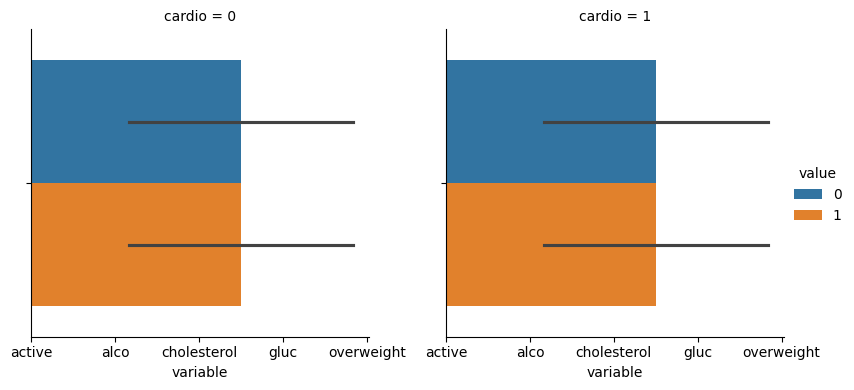

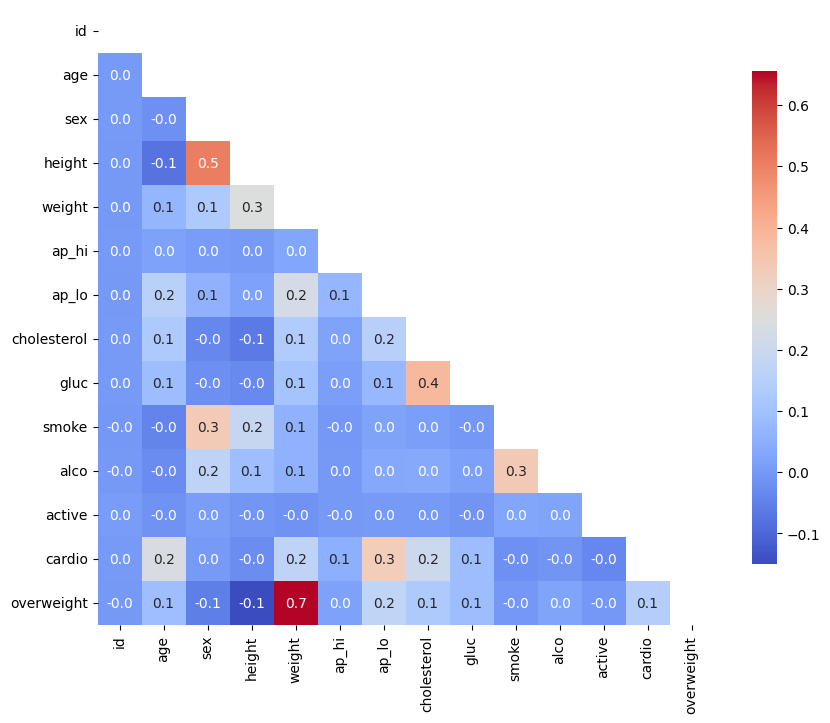

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the data
df = pd.read_csv(r"F:\analisis\localperfume\medical_examination.csv")

# Create the overweight column
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1 if x > 25 else 0)

# Normalize cholesterol and gluc
df['cholesterol'] = df['cholesterol'].apply(lambda x: 1 if x > 1 else 0)
df['gluc'] = df['gluc'].apply(lambda x: 1 if x > 1 else 0)

def draw_cat_plot():
    # Create a DataFrame for the cat plot
    df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    # Group and reformat the data
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    
    # Draw the cat plot
    fig = sns.catplot(x="variable", hue="value", col="cardio", data=df_cat, kind="bar", height=4, aspect=1)
    
    # Show the plot
    plt.show()
    
    # Return the figure for the output
    return fig

def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                  (df['height'] >= df['height'].quantile(0.025)) &
                  (df['height'] <= df['height'].quantile(0.975)) &
                  (df['weight'] >= df['weight'].quantile(0.025)) &
                  (df['weight'] <= df['weight'].quantile(0.975))]
    
    # Calculate the correlation matrix
    corr = df_heat.corr()
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))
    
    # Plot the heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
    
    # Show the heatmap
    plt.show()

# Test the functions and print results
if __name__ == "__main__":
    draw_cat_plot()
    draw_heat_map()
